## **Import libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## **Dataset Exploration**

In [2]:
df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
columnas_categoricas = df.select_dtypes(include=['object', 'category'])

for col in columnas_categoricas.columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Blood Pressure: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']
Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


## **Dataset Visualization**

**Histograms for Numerical Columns**

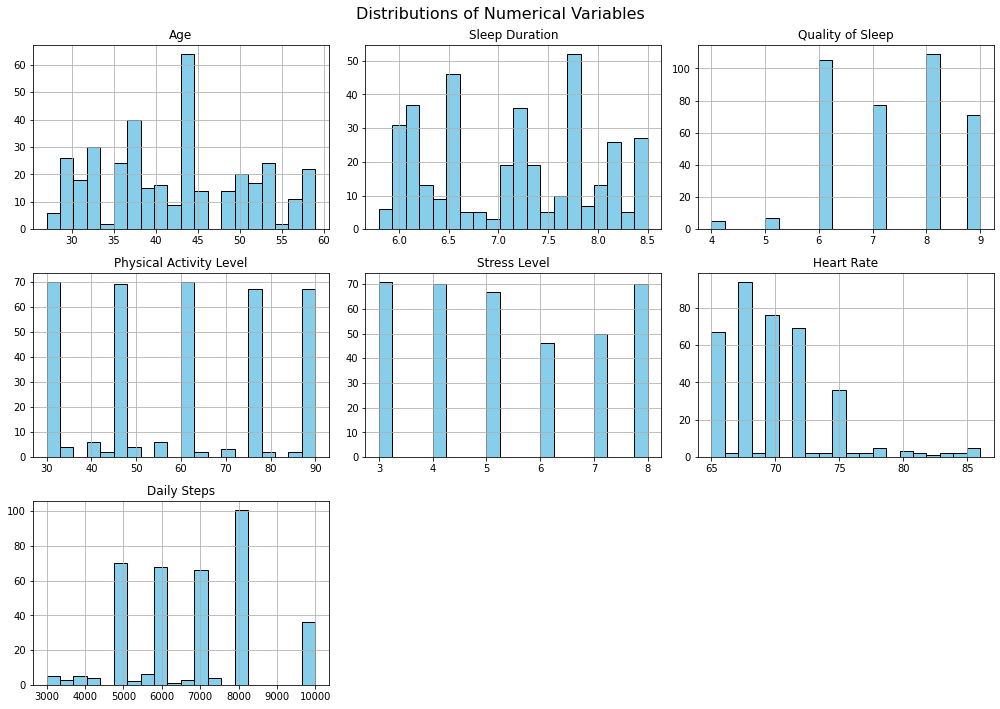

In [6]:
numerical_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 
                  'Physical Activity Level', 'Stress Level', 
                  'Heart Rate', 'Daily Steps']

df[numerical_cols].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distributions of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

**Boxplots for Outlier Detection**

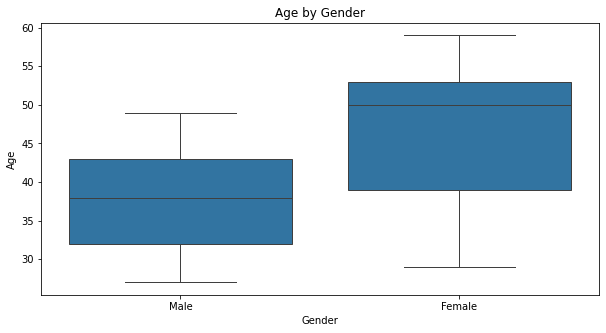

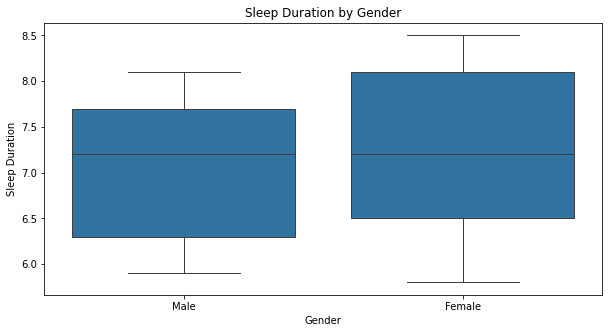

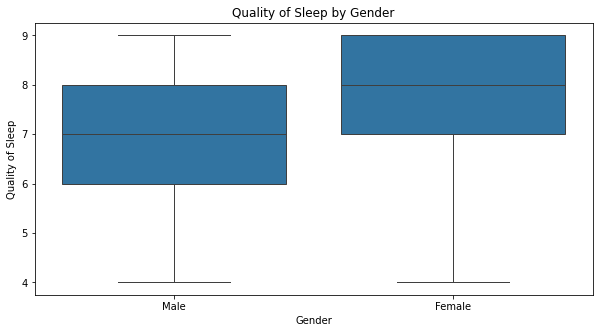

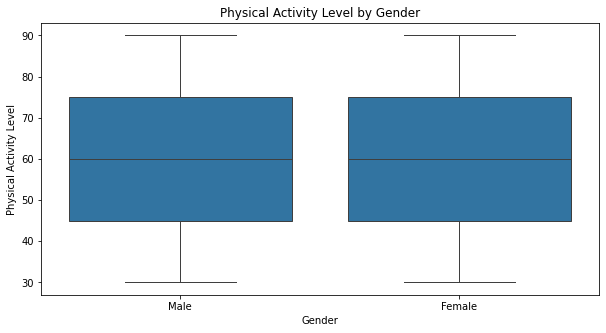

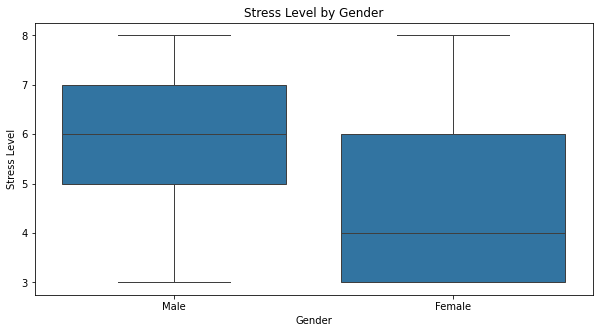

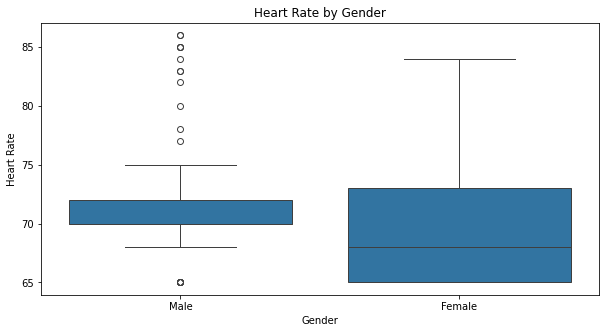

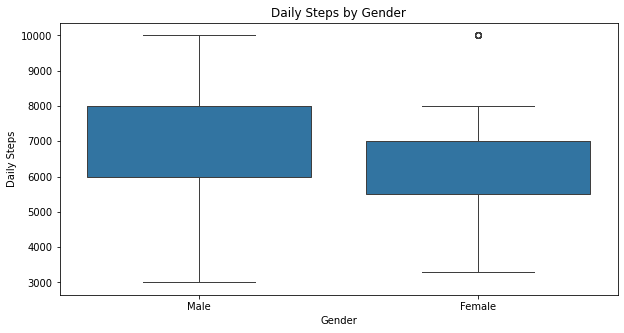

In [7]:
for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Gender', y=col, data=df)
    plt.title(f'{col} by Gender')
    plt.show()

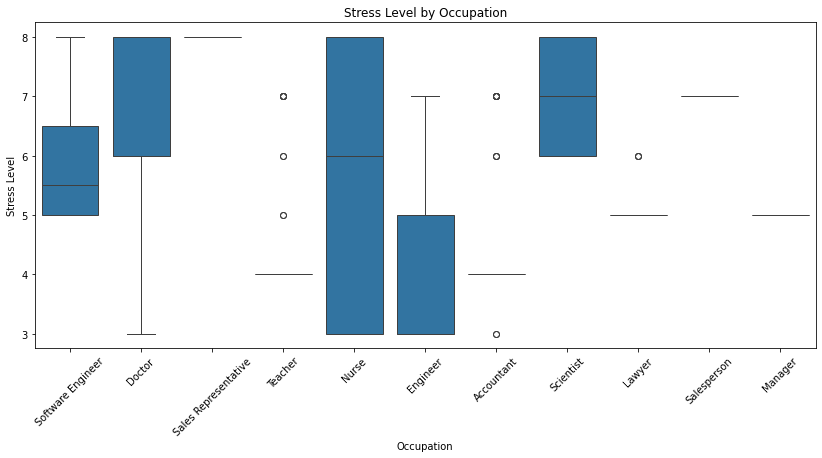

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Occupation', y='Stress Level', data=df)
plt.xticks(rotation=45)
plt.title('Stress Level by Occupation')
plt.show()

**Correlation Heatmap for Numerical Features**

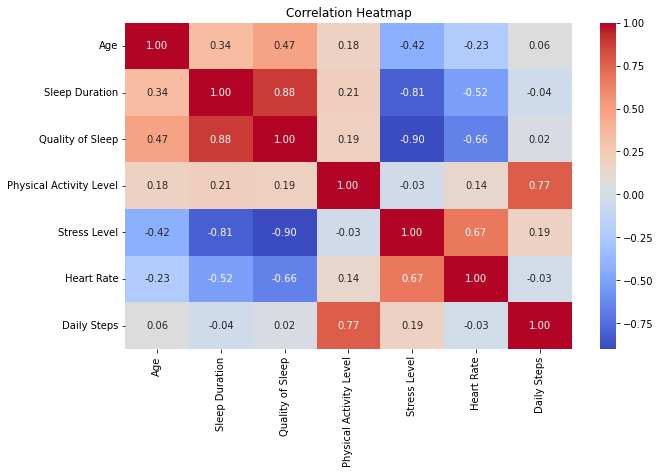

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Countplots for Categorical Columns**

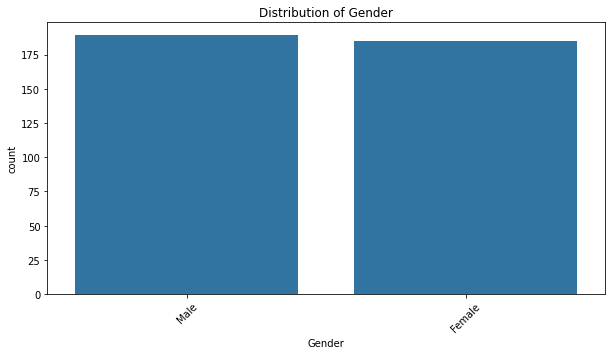

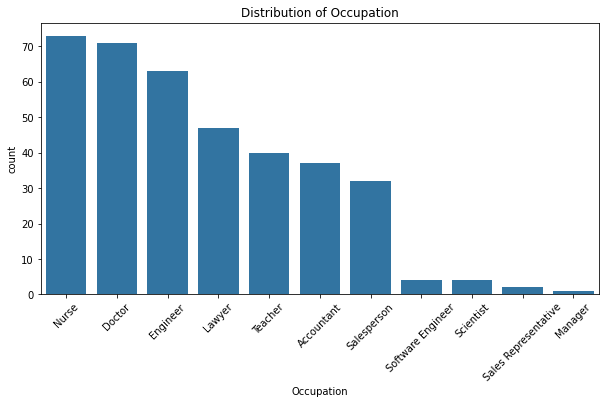

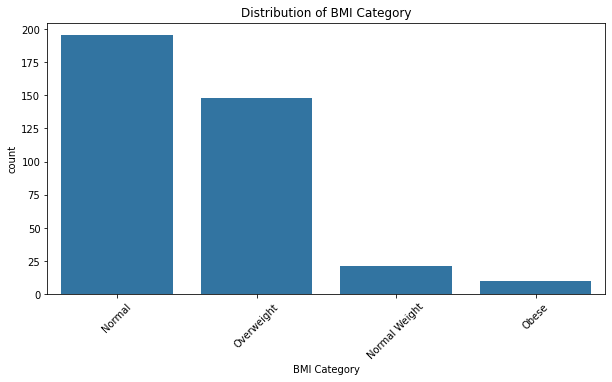

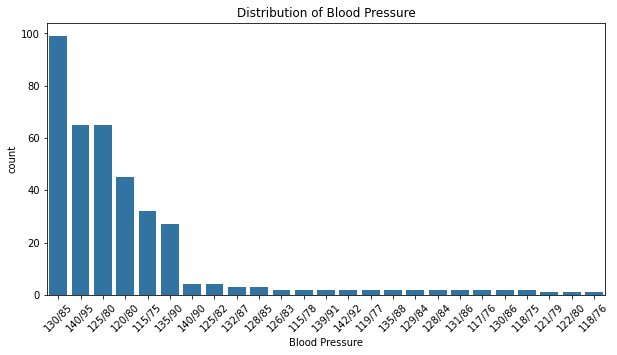

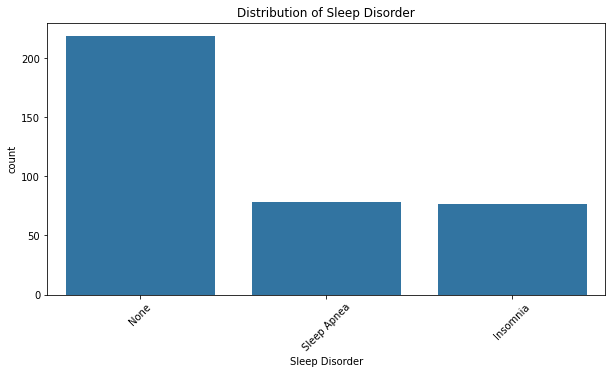

In [10]:
categorical_cols = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

**Categorical vs Numerical: Barplots**

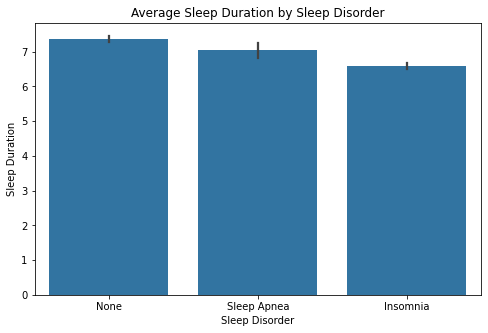

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Sleep Disorder', y='Sleep Duration', data=df, estimator='mean')
plt.title('Average Sleep Duration by Sleep Disorder')
plt.show()

**Grouped Barplot**

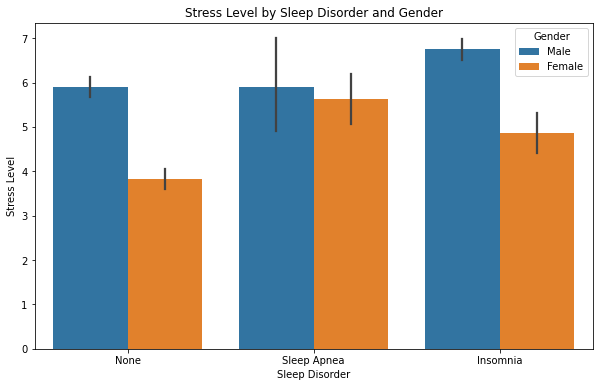

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Sleep Disorder', y='Stress Level', hue='Gender', data=df)
plt.title('Stress Level by Sleep Disorder and Gender')
plt.show()